# Gaussian joint vs Gaussian marginal

Generates the figure from chapter 5 that shows how to create a non-Gaussian joint distribution with Gaussian marginals using copula.

In [6]:
%matplotlib inline

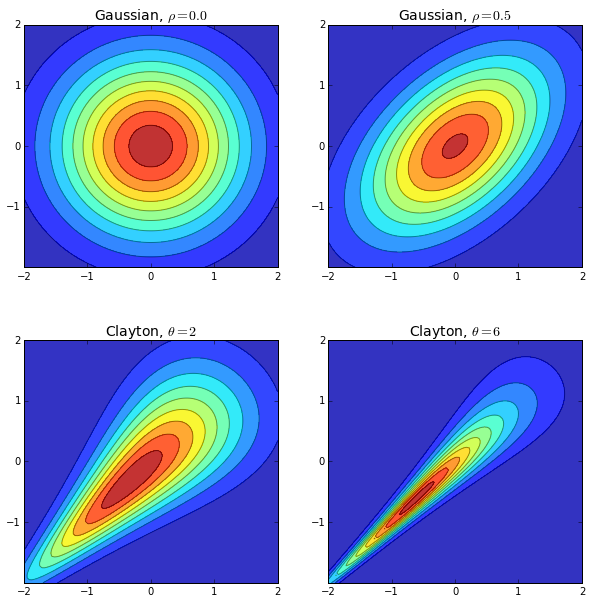

In [7]:

from matplotlib.mlab import bivariate_normal
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


def make_grid(left=-2, right=2, bottom=-2, top=2):
    x_grid = np.linspace(left, right, 100)
    y_grid = np.linspace(bottom, top, 100)
    X, Y = np.meshgrid(x_grid, y_grid)
    return X, Y


def gumbel_C(u, v, theta):
    g = lambda u: (-np.log(u))**theta
    z = (g(u) + g(v))**(1.0/theta)
    return np.exp(-z)


def clayton_C(X, Y, theta):
    "Clayton copula"
    g = lambda t: t**(-theta)
    z = np.maximum(g(u) + g(v) - 1, 0)
    return z**(-1.0/theta)

def clayton_c(u, v, theta):
    "Clayton density"
    a = (theta + 1) * (u * v)**(-theta-1)
    b = (u**(-theta) + v**(-theta) -1)**(-(2*theta+1.0)/theta)
    return a * b

def clayton_normal_mix(x, y, theta):
    u = norm.cdf(x)
    v = norm.cdf(y)
    return clayton_c(u, v, theta) * norm.pdf(x) * norm.pdf(y)


fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=.3)
axes = axes.flatten()

# Common operations
for ax in axes:
    ax.set_xticks(np.linspace(-2, 2, 5))
    ax.set_yticks(np.linspace(-1, 2, 4))


# Plot 1
ax = axes[0]

s_x, s_y = 1, 1
s_xy = 0.0

X, Y = make_grid()
Z = bivariate_normal(X, Y, s_x, s_y, 0, 0, s_xy)

ax.contourf(X, Y, Z, 10, alpha=0.8, cmap=cm.jet)
ax.contour(X, Y, Z, 10, colors='k', lw=1, alpha=0.4, antialias=True)

ax.set_title(r'Gaussian, $\rho=0.0$', fontsize=14)


# Plot 2
ax = axes[1]
s_x, s_y = 1, 1
s_xy = 0.5

X, Y = make_grid()
Z = bivariate_normal(X, Y, s_x, s_y, 0, 0, s_xy)

ax.contourf(X, Y, Z, 10, alpha=0.8, cmap=cm.jet)
ax.contour(X, Y, Z, 10, colors='k', lw=1, alpha=0.4, antialias=True)

ax.set_title(r'Gaussian, $\rho=0.5$', fontsize=14)



# Plot 3
ax = axes[2]

X, Y = make_grid()
Z = clayton_normal_mix(X, Y, 2)

ax.contourf(X, Y, Z, 10, alpha=0.8, cmap=cm.jet)
ax.contour(X, Y, Z, 10, colors='k', lw=1, alpha=0.4, antialias=True)

ax.set_title(r'Clayton, $\theta=2$', fontsize=14)



# Plot 4
ax = axes[3]

X, Y = make_grid()
Z = clayton_normal_mix(X, Y, 6.)

ax.contourf(X, Y, Z, 10, alpha=0.8, cmap=cm.jet)
ax.contour(X, Y, Z, 10, colors='k', lw=1, alpha=0.4, antialias=True)

ax.set_title(r'Clayton, $\theta=6$', fontsize=14)
plt.show()
